## Linear regression
We will be using formulation used in website [linear_regression](https://www.analyticsvidhya.com/blog/2021/04/gradient-descent-in-linear-regression/)

### GOAL
- Use graadient descent to get the best fitting line
- Make interactive demo

### Extra
- Use regularization

In [31]:
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
def get_loss_gradient(x, y_actual, y_pred):
  """
  Take data point(or array), actual, and predicted output values as input.
  calculate gradient with respect to slope m and intercept c.
  return gradient value wrt m and c
  """
  if y_actual.shape != y_pred.shape:
    raise ValueError(f'y_actual{y_actual.shape} and y_pred{y_pred.shape} shape not matching')

  n = len(y_actual)
  error = y_actual-y_pred
  # print(error)
  total_error = np.sum(error**2)
  # print(error.dot(x))

  dL_by_dm = (-2/n) * error.dot(x)
  dL_by_dc = (-2/n) * np.sum(error)
  
  return total_error, dL_by_dm, dL_by_dc

In [88]:
def solve_linear_regression(x, y, eta=0.01, tolerance=0.001, w_start=0, b_start=0):
  '''
  takes input x, output y and learning rate eta as input.
  gradient descent update is stopped when update is less than tolerance.
  gives best m and c.
  '''

  # Intialize slope and intercept
  if x.ndim == 1:
    x = x.reshape(x.shape[0],1)
    w = np.array([w_start])
  else:
    w = np.zeros(x.shape[-1]) + w_start
  b = b_start
  errors = [np.inf]
  w_array = [w]
  b_array = [b]
  continue_loop = True
  epoch = 0

  while continue_loop:
    y_pred = (x.dot(w.T)) + b

    L, dw, db = get_loss_gradient(x, y, y_pred)

    w = w - (eta*dw)
    b = b - (eta*db)

    w_array.append(w)
    b_array.append(b)
    errors.append(L)

    epoch += 1
    continue_loop = (errors[epoch-1] - errors[epoch]) > tolerance

  metadata = np.array([errors[1:], w_array[:-1], b_array[:-1]])
  return metadata.T, w, b 

In [91]:
x = np.array([[1, 2],
              [2, 3],
              [3, 4],
              [4, 5],
              [5, 6],
              [6, 7],
              [7, 8],
              [8, 9]]) 

# x = np.array([2, 3, 4, 5, 6, 7, 8, 9])   #2d example
y = np.array([4, 6, 9, 9, 13, 13, 17, 19])

print(x.shape, y.shape)
assert x.shape[0]==y.shape[0]

metadata_lmc, slope, intercept = solve_linear_regression(x, y, w_start=12500, b_start=-350) 

(8, 2) (8,)


/home/mayur/.local/lib/python3.6/site-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


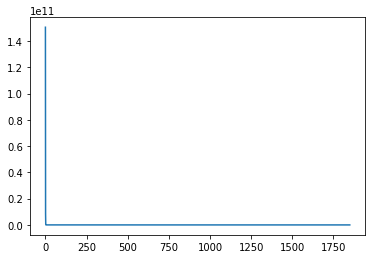

In [98]:
loss = metadata_lmc.T[0,:]
epochs = list(range(len(loss)))
sns.lineplot(y=list(loss), x=epochs)
plt.show()

In [84]:
np.full_like(x,2)

array([[2, 2],
       [2, 2],
       [2, 2],
       [2, 2],
       [2, 2],
       [2, 2],
       [2, 2],
       [2, 2]])